In [2]:
#Teo Tze Shuen
#S10204885
#Diploma in Accountancy
#TA24

In [3]:
#TODO - delete when done with project
#1. Create non-visual or visual plots to inspect each categorical and numeric field.
#2.	Identify potential data quality issues including data types.
#3.	Clean up the data for the issues identified.
#4.	Perform further data exploration on the cleaned data to uncover any interesting insight(s) using any two visual plots of your choice. 

In [4]:
#import relevant libraries - note i'm doing this first in VScode (for faster IntelliSense & version control)
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from datetime import datetime

In [5]:
data = pd.read_excel('Fraud_Data_Final.xlsx')
data.info() #check data imports sucessfully & get info on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             144546 non-null  float64
 7   ip_address      151112 non-null  float64
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


In [6]:
data.isnull().sum() #use isnull to check for missing values - then use .sum to total up so I don't have to look through each row
#age has 6566 missing values

user_id              0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age               6566
ip_address           0
days                 0
is_fraud             0
dtype: int64

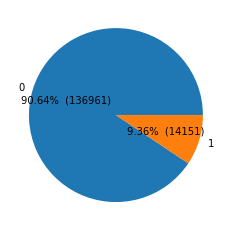

In [39]:
val = data.is_fraud.value_counts()
fig1, ax1 = plt.subplots()

def make_autopct(values): #return  percentage (actual value) - https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val) #percentage to 2dp
    return my_autopct

ax1.pie(val.values, labels=val.index,autopct=make_autopct(val), startangle=0)

plt.show()